# Answer the question

### Why do we use derivative / Gredient to fit a target function?

Because the gredient direction is the fasteset direction to decrease the loss, which means

fit the target function better than before.

### In the words'Gredient Descent',what's the Gredient and what's the Descent?

a' = a - η▽f Writing the formula can help us better explain. 

Gredient is the vector of bias derivation of the cofficients of the varibales of the 

objective function(▽f).And how much 'descent' does the target function have is 

controlled by learning rate(η).

### What's the advantages of the 3rd gradient descent method compared to the previous methods?

It is the fastest way to fit the target data compred with the previous methods.

### Using the simple words to describe: What's the machine leanring.

Assurme that P is the evalution to measure the performance of computer programme on 

target T.While a programme take advantage of experience E to increase the performance on 

target T, we call that the programme learn E about P and T.

### Why do we need dynamic programming? What's the difference of dynamic programming and previous talked search problme?

In some machine learning problems, a behaviour strategy may not receive immediate 

feedback(reinforce learning).Therefore such problems need dynamic programming, which is

designed to solve the multi-stage decision-making process by transforming the multi-stage

process into a serious of single-stage process. And then use the relationship of each 

stage to find the solution one by one.


### Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the  right answer based on inputs?

There are some practical application problems in scene, which can be abstracted for 

optimal routing problems. It is suitable for dynamic programming to solve.Sure that

traditional machine learning can work. But it needs not only enormous data but also a

complex formula/model to fit the data, which means we have to pay for more cost.

### Can you catch up at least 3 problems which could solved by Dynamic Programming?

Reinforce learning, Shortest route, Inventory management

### Can you catch up at least 3 problems wich could sloved by Edit Distance?

Machine transformer, Text similarity calculation, Spelling check

### Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature.

#### Optimal substructure, Inefficiency afterwards, Subproblem overlap

Optimal substructure: If the best solution of the problem is the same as its subproblems, we call that the problem satisfy Optimal substructure
    
Inefficiency afterwards: If the subproblem is certain, it will not affect by its superclass problems.

Subproblem overlap: When a problem is solved form top to bottom using recursive algorithms,

the subproblems that arise are not always new.

（1）最优子结构性质。如果问题的最优解所包含的子问题的解也是最优的，我们就称该问题具有最优子结构性质（即满足最优化原理）。最优子结构性质为动态规划算法解决问题提供了重要线索。

（2）无后效性。即子问题的解一旦确定，就不再改变，不受在这之后、包含它的更大的问题的求解决策影响。

（3）子问题重叠性质。子问题重叠性质是指在用递归算法自顶向下对问题进行求解时，每次产生的子问题并不总是新问题，有些子问题会被重复计算多次。动态规划算法正是利用了这种子问题的重叠性质，对每一个子问题只计算一次，然后将其计算结果保存在一个表格中，当再次需要计算已经计算过的子问题时，只是在表格中简单地查看一下结果，从而获得较高的效率。


### What's the disadvantages of Dynamic Programming?
The weakness of dynamic programming is that its calculated quantity and storge will 

increase rapidly with the increase of state and control dimensions. Besides, the excat  

mathematical analytic expressions are usually not available in practical problems. The 

range of its application is limited.

所以一个问题是该用递推、贪心、搜索还是动态规划，完全是由这个问题本身阶段间状态的转移方式决定的！

每个阶段只有一个状态->递推；

每个阶段的最优状态都是由上一个阶段的最优状态得到的->贪心；

每个阶段的最优状态是由之前所有阶段的状态的组合得到的->搜索；

每个阶段的最优状态可以从之前某个阶段的某个或某些状态直接得到而不管之前这个状态是如何得到的->动态规划。

# 代码复现：动态规划(Dynamic Programming)

In [6]:
original_price = [1,5,8,9,10,17,17,20,24,30,35]

In [7]:
from collections import defaultdict

price = defaultdict(int)

for i, p in enumerate(original_price):
    price[i+1] = p

In [8]:
price[11]

35

## Get the max splitting by enumerate

### 函数也可以作为参数传入

In [5]:
max(1,2,3,4)

4

In [6]:
def example(f, arg):
    return f(arg)

In [7]:
def add_ten(num):
    return num + 10

In [8]:
def mul_ten(num):
    return num * 10

In [9]:
operations = [add_ten, mul_ten]

for f in operations:
    print(example(f, 100))

110
1000


In [18]:
called_time = defaultdict(int)

def get_call_times(f):
    result = f()
    print('function: {} called once!'.format(f.__name__))
    called_time[f.__name__] += 1
    
    return result

In [19]:
def some_function_1(): print('I am function 1')

In [20]:
get_call_times(some_function_1)

I am function 1
function: some_function_1 called once!


In [21]:
called_time

defaultdict(int, {'some_function_1': 1})

In [22]:
def r(n):
    
    return max([price[n]] + [r(i) + r(n-i) for i in range(1, n)])

In [4]:
from functools import wraps

In [20]:
'''Python装饰器（decorator）在实现的时候，被装饰后的函数其实已经是另外一个函数了（函数名等函数属性会发生改变）
为了不影响，Python的functools包中提供了一个叫wraps的decorator来消除这样的副作用。
写一个decorator的时候，最好在实现之前加上functools的wrap，它能保留原有函数的名称和docstring
'''
call_time_with_arg = defaultdict(int)

def get_call_time(f):
    '''@param f is a function'''
    @wraps(f)
    def wrap(n):
        """Haha I am warp"""
        result = f(n)
        call_time_with_arg[(f.__name__, n)] += 1
#         print(call_time_with_arg)
        return result
    return wrap

In [35]:
def add_ten(n): return n + 10

In [36]:
add_ten(10)

20

In [37]:
add_ten = get_call_time(add_ten)

In [41]:
@get_call_time
def add_twenty(n):
    return n + 20

In [42]:
#由显示可以看出来，加了装饰器后，函数已经被添加了功能
add_twenty(9)

defaultdict(<class 'int'>, {('add_twenty', 9): 1})


29

In [43]:
add_twenty = get_call_time(add_twenty)

In [44]:
add_twenty(9)

defaultdict(<class 'int'>, {('add_twenty', 9): 2})
defaultdict(<class 'int'>, {('add_twenty', 9): 3})


29

In [9]:
#储存已经有的划分方式，加速动态规划过程
from functools import wraps

def memo(f):
    memo.already_computed = {}
    @wraps(f)
    def _wrap(arg):
        result = None
        
        if arg in memo.already_computed:
            result = memo.already_computed[arg]
        else:
            result = f(arg)
            memo.already_computed[arg] = result
            
        return result
    
    return _wrap

In [10]:
solution = {}

In [21]:
@memo
@get_call_time
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    
    
    max_price, max_split = max([(price[n],0)] + [(r(i) + r(n-i), i) for i in range(1, n)], key = lambda x: x[0])
    
    solution[n] = (n - max_split, max_split)
    
    return max_price

In [22]:
r(38)

118

In [23]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (11, 0),
 12: (11, 1),
 13: (11, 2),
 14: (11, 3),
 15: (13, 2),
 16: (14, 2),
 17: (11, 6),
 18: (17, 1),
 19: (17, 2),
 20: (17, 3),
 21: (11, 10),
 22: (11, 11),
 23: (22, 1),
 24: (22, 2),
 25: (22, 3),
 26: (24, 2),
 27: (25, 2),
 28: (22, 6),
 29: (28, 1),
 30: (28, 2),
 31: (28, 3),
 32: (22, 10),
 33: (22, 11),
 34: (33, 1),
 35: (33, 2),
 36: (33, 3),
 37: (35, 2),
 38: (36, 2),
 39: (33, 6),
 40: (39, 1),
 41: (39, 2),
 42: (39, 3),
 43: (33, 10),
 44: (33, 11),
 45: (44, 1),
 46: (44, 2),
 47: (44, 3),
 48: (46, 2),
 49: (47, 2),
 50: (44, 6),
 51: (50, 1),
 52: (50, 2),
 53: (50, 3),
 54: (44, 10),
 55: (44, 11),
 56: (55, 1),
 57: (55, 2),
 58: (55, 3),
 59: (57, 2),
 60: (58, 2),
 61: (55, 6),
 62: (61, 1),
 63: (61, 2),
 64: (61, 3),
 65: (55, 10),
 66: (55, 11),
 67: (66, 1),
 68: (66, 2),
 69: (66, 3),
 70: (68, 2),
 71: (69, 2),
 72: (66, 6),


In [24]:
r(275)

875

In [28]:
# call_time_with_arg

In [29]:
from collections import Counter
Counter(call_time_with_arg).most_common()

[(('r', 1), 1),
 (('r', 2), 1),
 (('r', 3), 1),
 (('r', 4), 1),
 (('r', 5), 1),
 (('r', 6), 1),
 (('r', 7), 1),
 (('r', 8), 1),
 (('r', 9), 1),
 (('r', 10), 1),
 (('r', 11), 1),
 (('r', 12), 1),
 (('r', 13), 1),
 (('r', 14), 1),
 (('r', 15), 1),
 (('r', 16), 1),
 (('r', 17), 1),
 (('r', 18), 1),
 (('r', 19), 1),
 (('r', 20), 1),
 (('r', 21), 1),
 (('r', 22), 1),
 (('r', 23), 1),
 (('r', 24), 1),
 (('r', 25), 1),
 (('r', 26), 1),
 (('r', 27), 1),
 (('r', 28), 1),
 (('r', 29), 1),
 (('r', 30), 1),
 (('r', 31), 1),
 (('r', 32), 1),
 (('r', 33), 1),
 (('r', 34), 1),
 (('r', 35), 1),
 (('r', 36), 1),
 (('r', 37), 1),
 (('r', 38), 1),
 (('r', 39), 1),
 (('r', 40), 1),
 (('r', 41), 1),
 (('r', 42), 1),
 (('r', 43), 1),
 (('r', 44), 1),
 (('r', 45), 1),
 (('r', 46), 1),
 (('r', 47), 1),
 (('r', 48), 1),
 (('r', 49), 1),
 (('r', 50), 1),
 (('r', 51), 1),
 (('r', 52), 1),
 (('r', 53), 1),
 (('r', 54), 1),
 (('r', 55), 1),
 (('r', 56), 1),
 (('r', 57), 1),
 (('r', 58), 1),
 (('r', 59), 1),
 (('r'

# 作业：使用L1范数损失的梯度下降

In [182]:
from sklearn.datasets import load_boston

In [183]:
data = load_boston()

In [184]:
X, y = data['data'], data['target']

In [185]:
import matplotlib.pyplot as plt

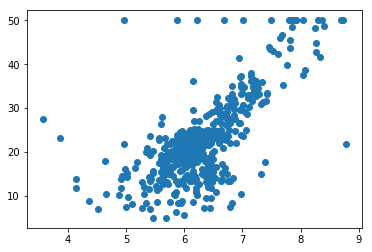

In [186]:
def draw_rm_and_price():
    return plt.scatter(X[:,5], y)

draw_rm_and_price()

In [187]:
def price(x, k, b): return k*x + b

In [188]:
def loss(y, y_hat):
    return sum(np.abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat)))/ len(list(y))

In [189]:
def partial_k(x, y, y_hat):
    
    n = len(y)
    
    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        
        gradient += abs(y_i - x_i)
    
    return gradient/ n

def partial_b(x, y, y_hat):
    
    n = len(y)
    
    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        
        gradient += abs(y_i - 1)
    
    return gradient/ n         

In [190]:
import random
import numpy as np

In [203]:
def gradient_decrease():
    try_times = 200
    X, y = data['data'], data['target']
    
    current_k = 40   #random.random()*200 - 100
    current_b = -80  #random.random()*200 - 100
    
    learning_rate = 0.01
    
    loss_record = []
    
    for i in range(try_times):
        
        price_estimate = [price(x, current_k, current_b) for x in X[:,5]]
        
        current_loss = loss(y, price_estimate)
        
#         print(current_loss)
        
        k_gradient = partial_k(X[:,5],y, price_estimate)
                
        b_gradient = partial_b(X[:,5],y, price_estimate)
                
        current_k = current_k - learning_rate * k_gradient
                
        current_b = current_b - learning_rate * b_gradient
        
        new_loss = loss(y, [price(x, current_k, current_b) for x in X[:,5]])
        
        loss_record.append(new_loss)
        
#         print(new_loss)
#         print(current_loss)
        
        if new_loss < current_loss:
            
            current_loss = new_loss
            
            if i % 20 == 0:
                
                print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, current_loss))
                
        elif new_loss >= current_loss:
            
            print('没有梯度下降')
            break;
            
        
    plt.scatter(X[:,5], y)
    plt.scatter(X[:,5], [price(x, current_k, current_b) for x in X[:,5]])
                

When time is : 0, get best_k: 39.83745808300395 best_b: -80.2153280632411, and the loss is: 147.61572458577996
When time is : 20, get best_k: 36.58661974308299 best_b: -84.52188932806315, and the loss is: 122.87883290216904
When time is : 40, get best_k: 33.33578140316203 best_b: -88.8284505928852, and the loss is: 98.14194121855817
When time is : 60, get best_k: 30.08494306324107 best_b: -93.13501185770725, and the loss is: 73.45848592393511
When time is : 80, get best_k: 26.83410472332011 best_b: -97.4415731225293, and the loss is: 48.90746565056237
When time is : 100, get best_k: 23.58326638339915 best_b: -101.74813438735136, and the loss is: 24.706091409065746
When time is : 120, get best_k: 20.33242804347819 best_b: -106.05469565217341, and the loss is: 7.237423375288242
没有梯度下降


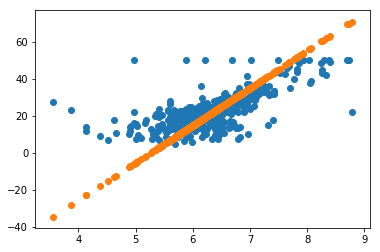

In [204]:
gradient_decrease()